# Fraud Detection Transactions by (Credit Card)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.tree import plot_tree
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r'C:\Users\ahsan computers\creditcard.csv'

data = pd.read_csv(csv_file_path)

In [4]:

scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data[["Amount"]]) 
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Training of RandomForestClassifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Step 5: Evaluating the model
accuracy = accuracy_score(y_test, predictions)
classification_report_output = classification_report(y_test, predictions)


Model Accuracy: 0.9995611109160493
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



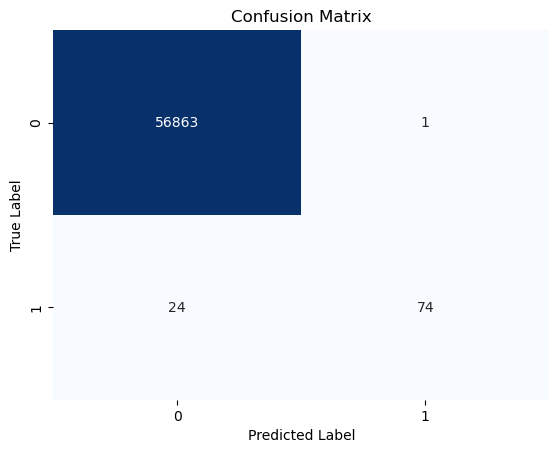

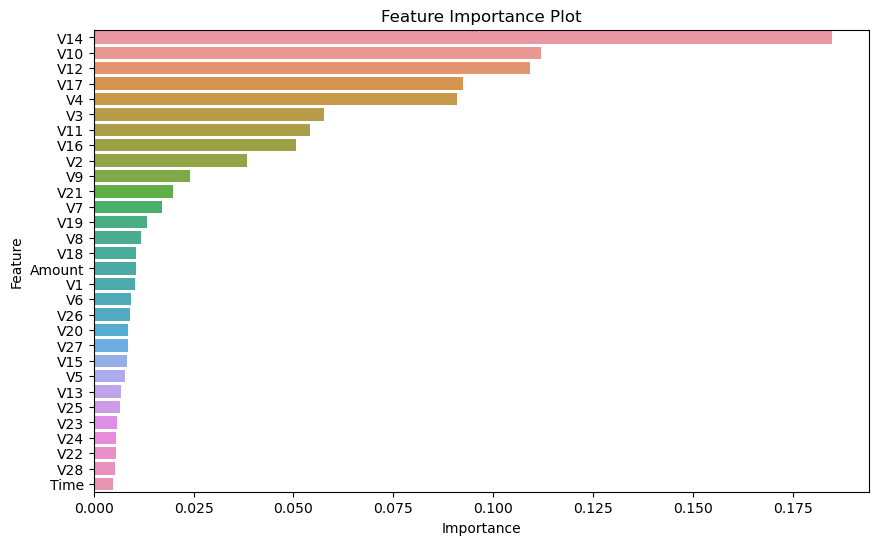

In [5]:
# Step 6: model evaluation metrics
print(f'Model Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

# Step 7: confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 8: feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

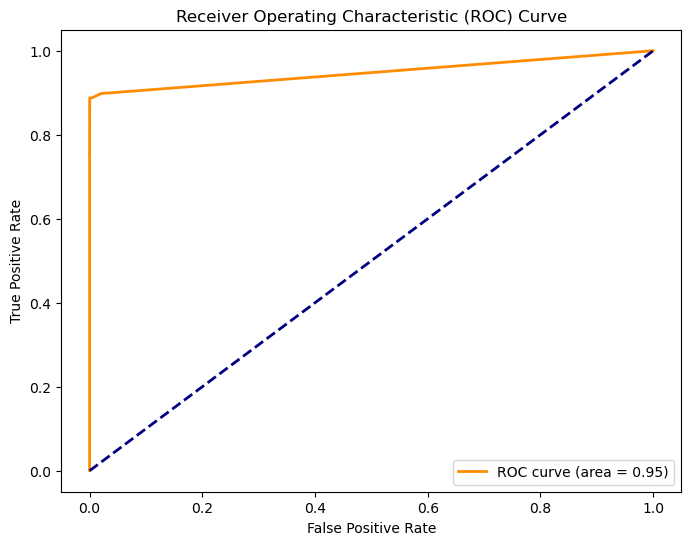

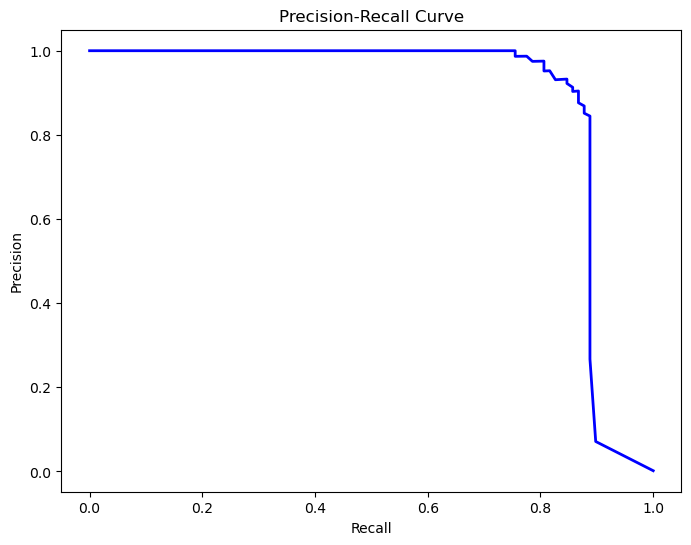

In [6]:
# Step 9: Additional Visualizations

# 9.1 ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 9.2 Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



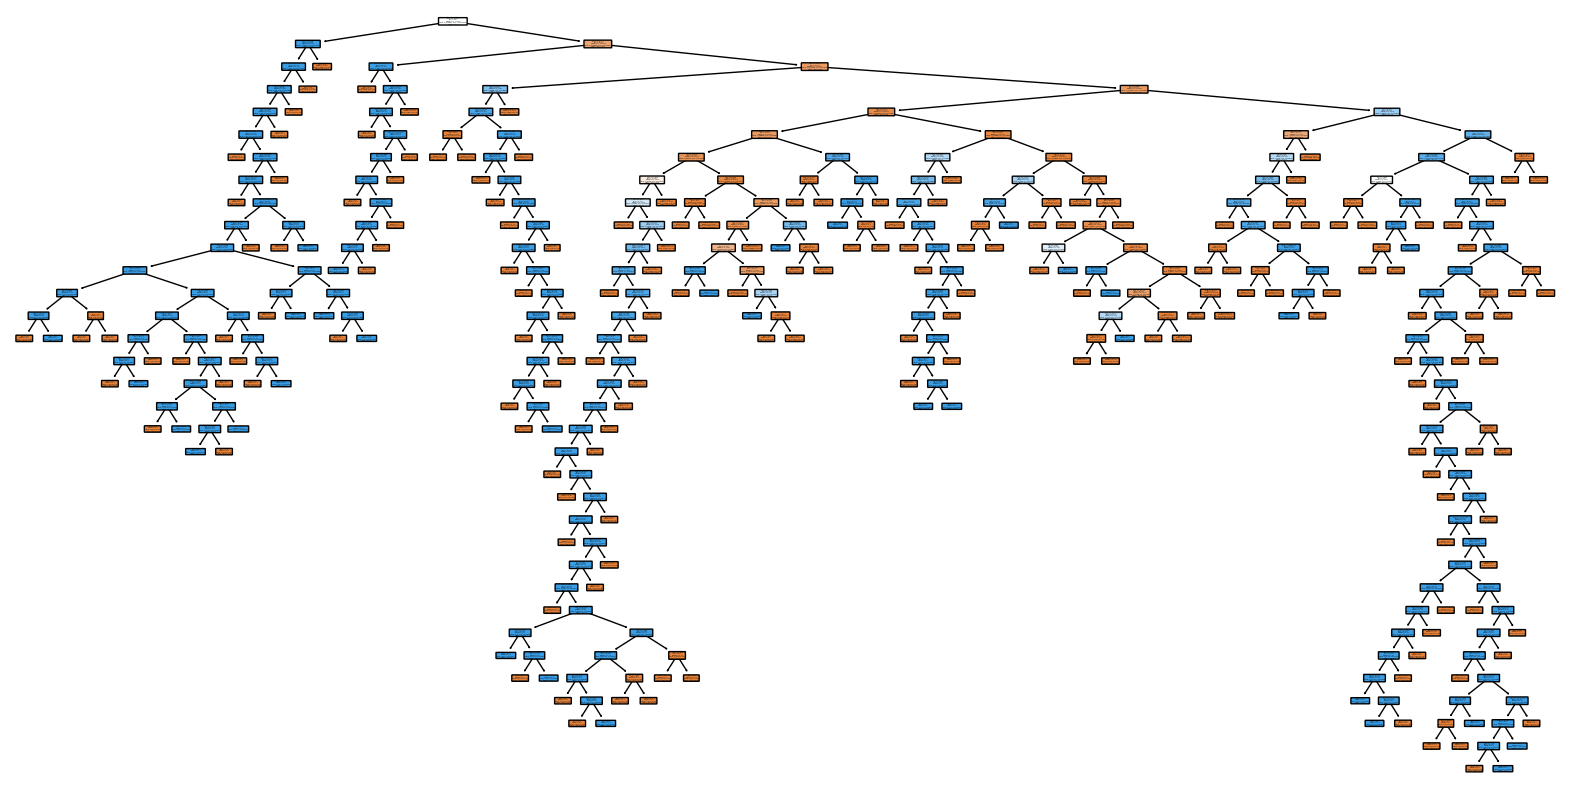

Model saved to model.joblib


In [7]:

# 9.3 Tree Visualization (for Random Forest)
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns.tolist(), class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.show()


model_filename = 'model.joblib'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')
